INSTALAÇÃO VERSÃO DO PYTON

In [1]:
!python -V
!pip -V

Python 3.10.12
pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


1. Script de Extração
O script para extrair a taxa CDI do site da B3 foi adaptado para ser executado 10 vezes para gerar nossa base de dados. Na sua máquina, crie o arquivo extracao.py com o script abaixo e execute-o com o comando:

In [2]:
!python extracao.py

python3: can't open file '/content/extracao.py': [Errno 2] No such file or directory


No final, você deve ter o arquivo taxa-cdi.csv com os dados extraídos.

In [6]:
import os
import time
import json
from random import random
from datetime import datetime

import requests

URL = 'https://www.b3.com.br/pt_br/regulacao/oficios-e-comunicados/cetip/'

# Criando a variável data e hora

for _ in range(0, 10):

  data_e_hora = datetime.now()
  data = datetime.strftime(data_e_hora, '%Y/%m/%d')
  hora = datetime.strftime(data_e_hora, '%H:%M:%S')

  # Captando a taxa CDI do site da B3

  try:
    response = requests.get(URL)
    response.raise_for_status()

    # Check if the response content type is JSON
    if 'application/json' in response.headers.get('Content-Type', ''):
        dado = json.loads(response.text)
        cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)
    else:
        print("Response is not in JSON format. Skipping.")
        cdi = None

  except requests.HTTPError as exc:
    print("Dado não encontrado, continuando.")
    cdi = None
  except Exception as exc:
    print("Erro, parando a execução.")
    raise exc

  # Verificando se o arquivo "taxa-cdi.csv" existe

  if os.path.exists('./taxa-cdi.csv') == False:

    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
      fp.write('data,hora,taxa\n')

  # Salvando dados no arquivo "taxa-cdi.csv"

  with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
    fp.write(f'{data},{hora},{cdi}\n')

  time.sleep(2 + (random() - 0.5))

print("Sucesso")

Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Response is not in JSON format. Skipping.
Sucesso


2. Script de Visualização
Já o script para gerar um grafico da taxa CDI do site da B3 foi adaptado para utilizar o pacote Pandas. Na sua máquina, crie o arquivo visualizacao.py com o script abaixo e execute-o com o comando:

<ipython-input-8-a8bc477afff4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = grafico.set_xticklabels(labels=df['hora'], rotation=90)


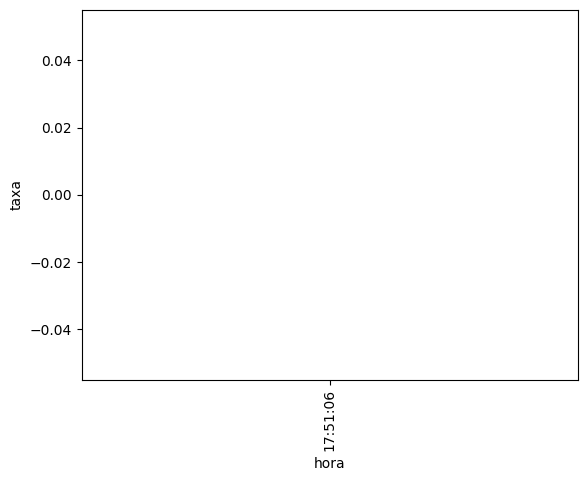

In [8]:
!pip install seaborn pandas
import seaborn as sns
import pandas as pd

# Assuming 'taxa-cdi.csv' contains your data
df = pd.read_csv('taxa-cdi.csv')

grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)

# Assuming you want to save the plot as 'grafico.png'
grafico.get_figure().savefig("grafico.png")

In [9]:
from sys import argv

print(argv)
print(type(argv))

['/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-f9a1eaad-1c52-43a1-a789-e9eee19ec0ed.json']
<class 'list'>


O script espera um parametro de entrada com o nome do gráfico, portanto substitua o <nome-do-grafico> pelo nome do seu gráfico. No final, você deve ter uma imagem no formato png com o nome passado via parametro contendo a visualização dos dados gerados pelo script de extração..

<ipython-input-10-04381e656c0b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = grafico.set_xticklabels(labels=df['hora'], rotation=90)


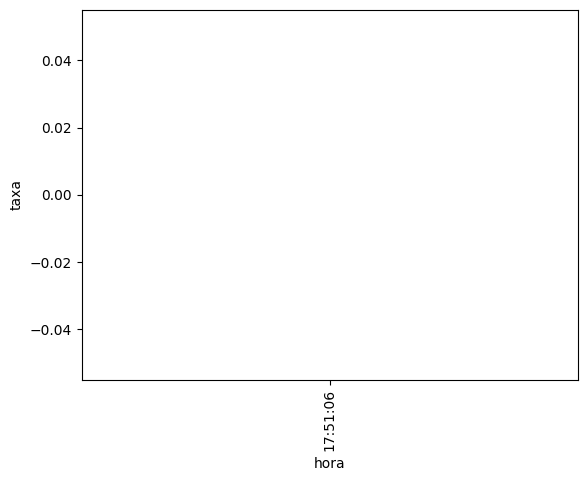

In [10]:
import csv
from sys import argv

import pandas as pd
import seaborn as sns

# Extraindo as colunas hora e taxa

df = pd.read_csv('./taxa-cdi.csv')

# Salvando no grafico

grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")

3. Combinando os scripts de extração e visualização.
Combine os scripts visualizacao.py e extracao.py no arquivo analise.py e execute-o na sua máquina, ele deve retornar os mesmos resultados: o arquivo csv e a imagem no formato png com o título escolhido via parametro de entrada. Procure seguir a organização proposta na aula (PEP8).

In [11]:
!python analise.py grafico = sns.lineplot(x=df['hora'], y=df['taxa'])_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python analise.py grafico = sns.lineplot(x=df['hora'], y=df['taxa'])_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)'


In [12]:
!python visualizacao.py grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python visualizacao.py grafico = sns.lineplot(x=df['hora'], y=df['taxa'])'


<ipython-input-12-a6e839e6c497>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = grafico.set_xticklabels(labels=df['hora'], rotation=90)


Além disso, copie o código na célula abaixo para que o tutor possa avaliar seu exercícios.

In [ ]:
# combinação dos scripts de extração e visualização

<ipython-input-13-04381e656c0b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = grafico.set_xticklabels(labels=df['hora'], rotation=90)


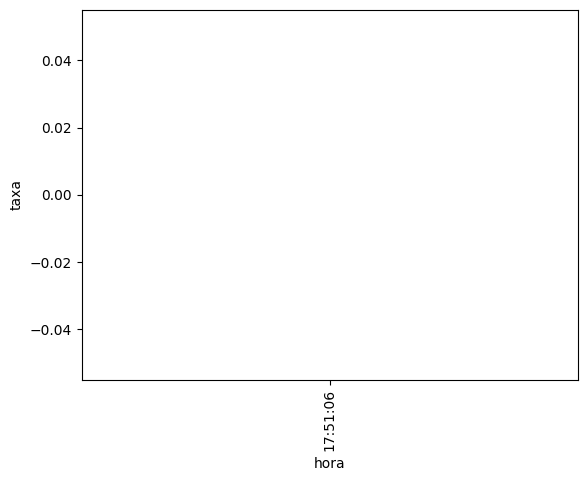

In [13]:
import csv
from sys import argv

import pandas as pd
import seaborn as sns

# Extraindo as colunas hora e taxa

df = pd.read_csv('./taxa-cdi.csv')

# Salvando no grafico

grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")